In [1]:
import numpy as np 
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import time

from IPython.display import clear_output
import multiprocessing
from multiprocessing import Pool
import tqdm

from LocalUtilities import *

np.seterr(all="ignore");



# 1 Linear Regression

A scientist studying weight fluctuation has collected data from some people. She is specifically interested in studying the influence of some features on the weight fluctuations of people. She collects data {$x^{(i)}$, $y^{(i)}$}$^{m}_{i=1}$, where $y^{(i)}$ is a continuous variable indicating the weight change, and $x^{(i)}$ = ($x_{i1}$, $x_{i2}$, . . . , $x_{id}$) are the variables which record different properties of people. These features are weight, height, age, amount of exercise time per day, and incoming calories per day. She also proceeds to collect new data to predict the weight change by using sound statistical methods. The dataset contains both the training and testing data. $\textbf{Note that you need to normalize the features}$.

Assume that sample size is $m$ = 200 and number of features is $d$ = 5. We model the problem as linear regression with cost function
$$
J(\Theta) = \frac{1}{2 m} \sum^{m}_{i=1}(h_{\Theta}(x^{(i)}) - y^{(i)})^2\text{,}
$$
where $h_{\Theta}(x^{(i)}) = \Theta_0 + \Theta_1x^{(i)}_1 + \cdots + \Theta_dx^{(i)}_d $.

## 1. Gradient Descent (GD)

#### (a) State the gradient of your cost function.

The gradient of the cost function is 
$$
\nabla_{\Theta} J(\Theta) = \frac{1}{2 m} \sum^{m}_{i=1}\nabla_{\Theta}( h_{\Theta}(x^{(i)}) - y^{(i)})^2\text{.}
$$
Since 
$$
\nabla_{\Theta}( h_{\Theta}(x^{(i)}) - y^{(i)})^2 = \nabla_{\Theta} ( \Theta_0 + \Theta_1x^{(i)}_1 + \cdots + \Theta_dx^{(i)}_d - y^{(i)} )^2\\ 
=2\begin{pmatrix}1 \\ x^{(i)}_1 \\ \cdots \\ x^{(i)}_d\end{pmatrix}( \Theta_0 + \Theta_1x^{(i)}_1 + \cdots + \Theta_dx^{(i)}_d - y^{(i)} ) 
= 2 \begin{pmatrix}1 \\ x^{(i)}_1 \\ \cdots \\ x^{(i)}_d\end{pmatrix}(h_{\Theta}(x^{(i)}) - y^{(i)})  \text{,}
$$
we get the following,
$$
\nabla_{\Theta} J(\Theta) = \frac{1}{m} \sum^{m}_{i=1}  \begin{pmatrix}1 \\ x^{(i)}_1 \\ \cdots \\ x^{(i)}_d\end{pmatrix}(h_{\Theta}(x^{(i)}) - y^{(i)}) \text{.}
$$

Using the gradient of our cost function, we can now implement the Gradient Descent algorithm. The algorithm minimizes the cost function with a simple update rule: $\Theta := \Theta - \alpha \nabla_\Theta J(\Theta)$. Until it converges.
We define $\alpha$ as a the step-size (or the learning rate) of the algorithm, it takes a value between 0 and 1.

#### (b) Implementation of the gradient descent algorithm

Implement the gradient descent method using your derived gradient to minimize the cost function. Fit the model ($\Theta$) using training data (weighttrain.mat), and report the learned model and the cost function for the learned model. Try to tune step-size $\alpha$ of GD to reach the fastest converging rate of decreasing cost function in time.

**Important notes:** For this question, at each iteration, do not update all the $\Theta$ is simultaneously, instead update them one by one. Also, set the initial value to zero vector. Moreover, make sure you do enough iterations so that your model converges.

Firstly, we import the training data into two NumPy arrays called x and y.

In [2]:
#Loading the training data
mat = scipy.io.loadmat('Q1-Dataset/weighttrain.mat')

#Converting from dictonary array into numpy array
x = np.array(mat['x'])
y = np.array(mat['y'])
#Normalising the features for optimal performance 
norme_of_x = np.linalg.norm(x)
x = x / norme_of_x

Next, we define $h_\Theta(x^{(i)})$, the cost function and the gradient of the cost function.

In [1]:
def h_Theta(Theta_,x_i_):
    return Theta_[0] + np.dot(Theta_[1:6],x_i_)

def cost_func(Theta_,x_,y_):
    _sum = 0
    for x_i, y_i in zip(x_, y_):
        _sum = _sum + np.square( h_Theta( Theta_, x_i ) - y_i )
        
    return np.divide(_sum,2*np.size(x,0))
    
def cost_func_grad(Theta_,x_,y_):
    _sum = 0
    for x_i, y_i in zip(x_, y_):
        _sum = _sum + ( h_Theta( Theta_,x_i ) - y_i ) * np.insert(x_i, 0, 1)
        
    return _sum/np.size(x_,0)

def gd_iterration(Theta_,alpha_,x_,y_):
        return Theta_ - alpha_ * cost_func_grad(Theta_,x_,y_)

def GD(Theta_, alpha_, x_, y_, IterMax_, StepLim_):
    tic = time.process_time()
    Theta_old_ = Theta_
    Theta_[0] = gd_iterration(Theta_,alpha_,x_,y_)[0]
    Iterractions = 1
    for k in range(6):
        Theta_old_ = Theta_
        Theta_[k] = gd_iterration(Theta_,alpha_,x_,y_)[k]
        Iterractions = Iterractions + 1
        #while not abs(cost_func_grad(Theta_,x_,y_)-cost_func_grad(Theta_old_,x_,y_))[k] < StepLim:
        #while not abs(cost_func(Theta_,x_,y_)-cost_func(Theta_old_,x_,y_)) < StepLim:
        while not(Theta_[k] == Theta_old_[k]):
            Theta_old_[k] = Theta_[k]
            Theta_[k] = gd_iterration(Theta_,alpha_,x_,y_)[k]
            Iterractions = Iterractions + 1
            if Iterractions > IterMax_:
                break
    toc = time.process_time() -tic
    return np.append(Theta_,[Iterractions,alpha_,toc])

def GD_Work_Alpha(alpha_):
    return GD(np.array([0.0,0.0,0.0,0.0,0.0,0.0]), alpha_, shared_x, shared_y, shared_IterMax, shared_StepLim)

def init_worker_alpha(x_,y_,IterMax_,StepLim_):
    global shared_x
    global shared_y
    global shared_IterMax
    global shared_StepLim
    
    shared_x = x_
    shared_y = y_
    shared_IterMax = IterMax_
    shared_StepLim = StepLim_

We can now try to find an optimal value for the step size $\alpha$. To do this efficiently (without the GPU for now) we need to use multithreading.

We can now set the default parameters for the GD.

We define this function so we can pin point alpha.

In [20]:
def TestForAlpha(alphas,IterMax,x,y,StepLim,LinePos):
    
    p = Pool(processes=multiprocessing.cpu_count(),initializer=init_worker_alpha, initargs=(x,y,IterMax,StepLim,))
    
    # With this we can implement a progress bar but the list is unordered
    data = []
    for dat in tqdm.tqdm(p.imap_unordered(GD_Work_Alpha, alphas), total=len(alphas)):
        data.append(dat)
    #Old method no progress bar but list is ordered       
    #data = p.map(GD_Work_Alpha,alphas)
    p.close()

    Thetas = [] 
    cost = []
    Iterrs = []
    tocs = []
    Alphas = []

    for i, dat in zip(range(np.size(data,0)),data):
        #if dat[6] < IterMax:
        Thetas = np.append(Thetas, dat[0:6])
        Iterrs = np.append(Iterrs,dat[6])
        Alphas = np.append(Alphas,dat[7])
        tocs = np.append(tocs,dat[8])
        cost = np.append(cost,cost_func(dat[0:6],x,y))

    combined = list(zip(Alphas, Thetas, Iterrs, tocs, cost))
    sorted_combined = sorted(combined, key=lambda x: x[0])
    Alphas, Thetas, Iterrs, tocs, cost = zip(*sorted_combined)
    
    Triplotlog(Alphas,Iterrs,cost,'Iter','Cost')
    Triplotlog(Alphas,tocs,cost,'Time','Cost')

Next we will test different values for alpha until we are confident in what the optimal value is.

In [21]:
IterMax = 10000 #Maximum number of iterations before the algorithm stops
StepLim = 1e-20 #Smalest step that is considered to be non stationary (set to 0 for fixed number of iterations)
LinePos = 1
alphas = np.linspace(0.1,2,num=20)

p = Pool(processes=multiprocessing.cpu_count(),initializer=init_worker_alpha, initargs=(x,y,IterMax,StepLim,))
    
# With this we can implement a progress bar but the list is unordered
data = []
for dat in tqdm.tqdm(p.imap_unordered(GD_Work_Alpha, alphas), total=len(alphas)):
    data.append(dat)
#Old method no progress bar but list is ordered       
#data = p.map(GD_Work_Alpha,alphas)
p.close()


  0%|          | 0/20 [00:00<?, ?it/s]

In [22]:
Thetas = [] 
cost = []
Iterrs = []
tocs = []
Alphas = []

for i, dat in zip(range(np.size(data,0)),data):
    #if dat[6] < IterMax:
    Thetas = np.append(Thetas, dat[0:6])
    Iterrs = np.append(Iterrs,dat[6])
    Alphas = np.append(Alphas,dat[7])
    tocs = np.append(tocs,dat[8])
    cost = np.append(cost,cost_func(dat[0:6],x,y))
    print('cost is : ',cost_func(dat[0:6],x,y),' for alpha = ', dat[7],'\n And Theta is : ',dat[0:6], '\n\n\n')

combined = list(zip(Alphas, Thetas, Iterrs, tocs, cost))
sorted_combined = sorted(combined, key=lambda x: x[0])
Alphas, Thetas, Iterrs, tocs, cost = zip(*sorted_combined)



fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(Alphas, cost, "C0", label="alpha")
p2, = twin1.plot(Alphas, Iterrs, "C1", label="Iterrations")
p3, = twin2.plot(Alphas, tocs, "C2", label="Time")

#ax.set(xlim=(0, 2), ylim=(0, 2), xlabel="Distance", ylabel="Density")
#twin1.set(ylim=(0, 4), ylabel="Temperature")
#twin2.set(ylim=(1, 65), ylabel="Velocity")
ax.set( xlabel="alpha", ylabel="cost")
twin1.set( ylabel="Iterractions")
twin2.set( ylabel="Time")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

ax.tick_params(axis='y', colors=p1.get_color())
twin1.tick_params(axis='y', colors=p2.get_color())
twin2.tick_params(axis='y', colors=p3.get_color())

ax.legend(handles=[p1, p2, p3])

plt.show()

100%|██████████| 200/200 [00:00<00:00, 300.96it/s]


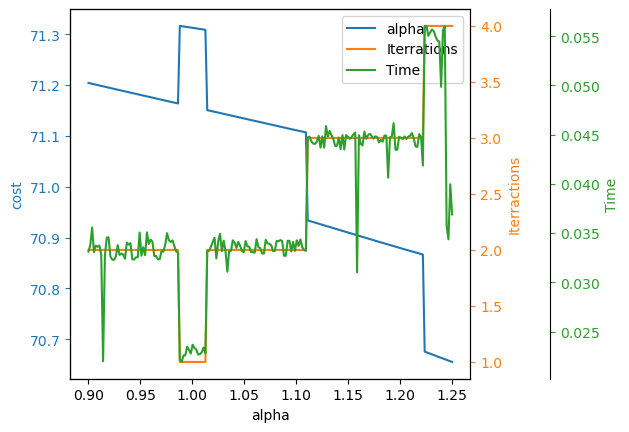

In [7]:
IterMax = 20000 #Maximum number of iterations before the algorithm stops
StepLim = 0.3 #Smalest step that is considered to be non stationary (set to 0 for fixed number of iterations)
LinePos = 1
alphas = np.linspace(0.9,1.25,num=200)

p = Pool(processes=multiprocessing.cpu_count(),initializer=init_worker_alpha, initargs=(x,y,IterMax,StepLim,))
    
# With this we can implement a progress bar but the list is unordered
data = []
for dat in tqdm.tqdm(p.imap_unordered(GD_Work_Alpha, alphas), total=len(alphas)):
    data.append(dat)
#Old method no progress bar but list is ordered       
#data = p.map(GD_Work_Alpha,alphas)
p.close()

Thetas = [] 
cost = []
Iterrs = []
tocs = []
Alphas = []

for i, dat in zip(range(np.size(data,0)),data):
    #if dat[6] < IterMax:
    Thetas = np.append(Thetas, dat[0:6])
    Iterrs = np.append(Iterrs,dat[6])
    Alphas = np.append(Alphas,dat[7])
    tocs = np.append(tocs,dat[8])
    cost = np.append(cost,cost_func(dat[0:6],x,y))

combined = list(zip(Alphas, Thetas, Iterrs, tocs, cost))
sorted_combined = sorted(combined, key=lambda x: x[0])
Alphas, Thetas, Iterrs, tocs, cost = zip(*sorted_combined)



fig, ax = plt.subplots()
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines.right.set_position(("axes", 1.2))

p1, = ax.plot(Alphas, cost, "C0", label="alpha")
p2, = twin1.plot(Alphas, Iterrs, "C1", label="Iterrations")
p3, = twin2.plot(Alphas, tocs, "C2", label="Time")

#ax.set(xlim=(0, 2), ylim=(0, 2), xlabel="Distance", ylabel="Density")
#twin1.set(ylim=(0, 4), ylabel="Temperature")
#twin2.set(ylim=(1, 65), ylabel="Velocity")
ax.set( xlabel="alpha", ylabel="cost")
twin1.set( ylabel="Iterractions")
twin2.set( ylabel="Time")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

ax.tick_params(axis='y', colors=p1.get_color())
twin1.tick_params(axis='y', colors=p2.get_color())
twin2.tick_params(axis='y', colors=p3.get_color())

ax.legend(handles=[p1, p2, p3])

plt.show()

Here we can that the optimal value for alpha is between 74 and 75. He will choose 74.

In [13]:
alpha = 2


#### (c) Plot cost function in number of iterations.

To do this using the same multiprocessing used previously we will define a new function for the workers.

In [14]:
def GD_Work_Iterr(IterMax_):
    return GD(np.array([0,0,0,0,0,0]), shared_alpha, shared_x, shared_y, IterMax_, shared_StepLim)

def init_worker_Iterr(x_,y_,alpha_,StepLim_):
    global shared_x
    global shared_y
    global shared_alpha
    global shared_StepLim
    
    shared_x = x_
    shared_y = y_
    shared_alpha = alpha_
    shared_StepLim = StepLim_

100%|██████████| 5/5 [00:00<00:00, 226.94it/s]


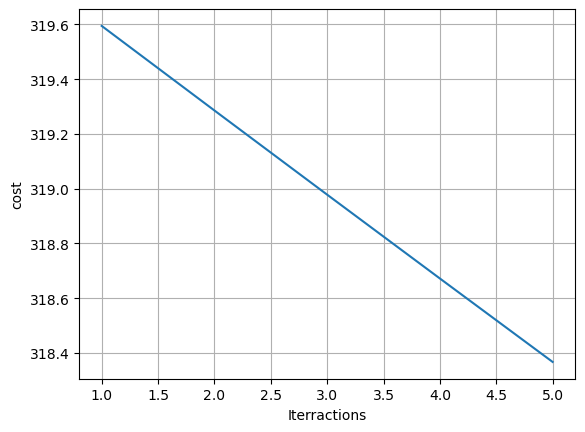

In [15]:
StepLim = 0 #Smalest step that is considered to be non stationary (set to 0 for fixed number of iterations)
LinePos = 1
Iters = np.arange(0,5,1)

p = Pool(processes=multiprocessing.cpu_count(),initializer=init_worker_Iterr, initargs=(x,y,alpha,StepLim,))
    
# With this we can implement a progress bar but the list is unordered
data = []
for dat in tqdm.tqdm(p.imap_unordered(GD_Work_Iterr, Iters), total=len(Iters)):
    data.append(dat)
#Old method no progress bar but list is ordered       
#data = p.map(GD_Work_Alpha,alphas)
p.close()

Thetas = [] 
cost = []
Iterrs = []
tocs = []
Alphas = []

for i, dat in zip(range(np.size(data,0)),data):
    #if dat[6] < IterMax:
    Thetas = np.append(Thetas, dat[0:6])
    Iterrs = np.append(Iterrs,dat[6])
    Alphas = np.append(Alphas,dat[7])
    tocs = np.append(tocs,dat[8])
    cost = np.append(cost,cost_func(dat[0:6],x,y))

combined = list(zip(Alphas, Thetas, Iterrs, tocs, cost))
sorted_combined = sorted(combined, key=lambda x: x[0])
Alphas, Thetas, Iterrs, tocs, cost = zip(*sorted_combined)


fig, ax = plt.subplots()
ax.plot(Iterrs, cost)

ax.set(xlabel='Iterractions', ylabel='cost')
ax.grid()

fig.savefig("test.png")
plt.show()

Let's Now test the test data:

In [33]:
Theta = GD(np.array([0,0,0,0,0,0]), alpha, x, y, 200, 0)[0:6]

mat = scipy.io.loadmat('Q1-Dataset/weighttest.mat')

#Converting from dictonary array into numpy array
x = np.array(mat['x'])
y = np.array(mat['y'])

#Normalizing the features
for i in range(np.size(x,1)):
    x[i,:]/= np.sqrt((x[i,:] ** 2).sum(-1))[..., np.newaxis]
    
print(cost_func(Theta,x,y))

[0.28396979]
